In [1]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [4]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [5]:
df = pd.read_excel('Gold_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

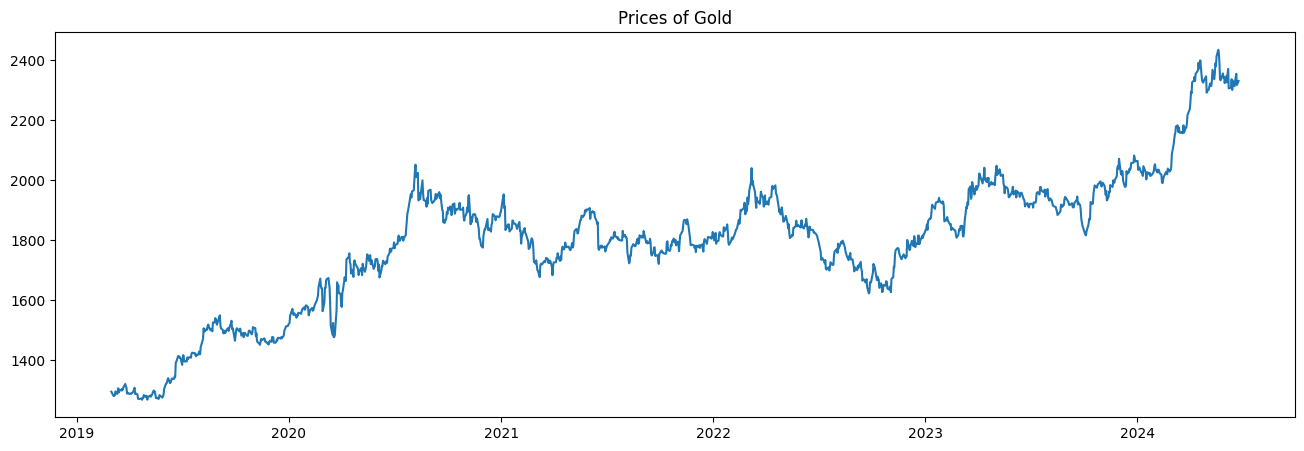

In [6]:
    # Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

    # Format column Price to float




    # Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

    # Plot the 'price' column of the 'df' DataFrame
    plt.figure(figsize=(16,5))
    plt.plot(df1['close'])
    plt.title('Prices of Gold')
    plt.show()

In [7]:
df

,date,open,high,low,close,volume
2019-03-01,2019-03-01,1312.199951,1312.199951,1288.900024,1296.400024,110
2019-03-04,2019-03-04,1285.500000,1287.000000,1281.900024,1284.800049,28
2019-03-05,2019-03-05,1287.000000,1287.000000,1282.000000,1282.000000,114
2019-03-06,2019-03-06,1287.099976,1287.099976,1282.599976,1284.900024,14
2019-03-07,2019-03-07,1281.000000,1284.599976,1281.000000,1283.800049,11
...,...,...,...,...,...,...
2024-06-17,2024-06-17,2320.199951,2320.199951,2309.600098,2312.399902,110
2024-06-18,2024-06-18,2311.800049,2330.399902,2311.800049,2330.399902,43
2024-06-20,2024-06-20,2328.899902,2354.000000,2328.300049,2353.800049,183
2024-06-21,2024-06-21,2331.199951,2331.199951,2316.399902,2316.399902,76


In [8]:
# Split dataset 

In [9]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [10]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [11]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [12]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.14605, saving model to save_model_7_2_1.keras
17/17 - 3s - 178ms/step - loss: 0.1461
Epoch 2/80

Epoch 2: loss improved from 0.14605 to 0.04752, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0475
Epoch 3/80

Epoch 3: loss improved from 0.04752 to 0.03565, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0357
Epoch 4/80

Epoch 4: loss improved from 0.03565 to 0.03096, saving model to save_model_7_2_1.keras
17/17 - 1s - 44ms/step - loss: 0.0310
Epoch 5/80

Epoch 5: loss did not improve from 0.03096
17/17 - 1s - 44ms/step - loss: 0.0313
Epoch 6/80

Epoch 6: loss did not improve from 0.03096
17/17 - 1s - 44ms/step - loss: 0.0314
Epoch 7/80

Epoch 7: loss improved from 0.03096 to 0.02978, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0298
Epoch 8/80

Epoch 8: loss did not improve from 0.02978
17/17 - 1s - 44ms/step - loss: 0.0303
Epoch 9/80

Epoch 9: loss improved from 0.02978 to

In [13]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Original y_train shape: (837, 1)
Predicted y_train shape: (837, 1)


In [14]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [15]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6689850176124654, 0.6729349559903242, 0.6584235129714655, 0.6494933861277543, 0.6570496714918301, 0.6576506943837377, 0.6550747023029009, 0.6474326763169937, 0.6430534059256623, 0.6213292689343695, 0.6190967634277884, 0.6292289360553147, 0.6373003988720811, 0.6510390233032108, 0.6465740122900481, 0.6443414019660807, 0.6605701730388296, 0.6518976873301565, 0.6566203394783574, 0.6557616754514117, 0.6666666666666667, 0.7020435826498714, 0.728490476606751, 0.7420574101594462, 0.7564830077390869, 0.7630946788196136, 0.7807832416286022, 0.7841319474797812, 0.7651553886303744, 0.7780353490345584, 0.7673879989543417, 0.7624936559277062, 0.7654130297654125, 0.7616349919007606, 0.7630087285630103, 0.7840459972231777, 0.7631806290762171, 0.7775202763992544, 0.7782072495477654, 0.7910872099519497, 0.8140992381662744, 0.8304998049348444, 0.8515370735950121, 0.8802163682410866, 0.8754079754710546, 0.907092594211439, 0.9122445783731126, 0.9223768558180254, 0.9104415096973899, 0.9320798012

In [17]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8722073435783386], [0.8289996981620789], [0.7949559092521667], [0.7723333835601807], [0.7551922798156738], [0.7388045787811279], [0.7211547493934631], [0.7023505568504333], [0.6834304928779602], [0.665433406829834], [0.6489718556404114], [0.6342058181762695], [0.6210055351257324], [0.6091318726539612], [0.5983553528785706], [0.5885044932365417], [0.5794646143913269], [0.5711563229560852], [0.5635128021240234], [0.556464433670044], [0.5499340891838074], [0.5438388586044312], [0.538096010684967], [0.5326281189918518], [0.5273672938346863], [0.5222575664520264], [0.5172551274299622], [0.5123274922370911], [0.507452130317688], [0.5026145577430725]]


In [18]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [19]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2285.07259339]
 [2234.75297587]
 [2195.10558429]
 [2168.75939419]
 [2148.79686728]
 [2129.71175305]
 [2109.15676433]
 [2087.25740445]
 [2065.22310072]
 [2044.26369695]
 [2025.09257684]
 [2007.89605177]
 [1992.52300407]
 [1978.69493849]
 [1966.14460514]
 [1954.67229544]
 [1944.14445387]
 [1934.46861888]
 [1925.56697564]
 [1917.35844677]
 [1909.75320853]
 [1902.65470389]
 [1895.96658405]
 [1889.59867818]
 [1883.47192198]
 [1877.52113422]
 [1871.69529446]
 [1865.95657124]
 [1860.27872546]
 [1854.64488915]]


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler và huấn luyện với dữ liệu ban đầu
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  # Thay 'close' bằng tên cột chứa giá trị cần chuẩn hóa trong dữ liệu của bạn


MinMaxScaler()

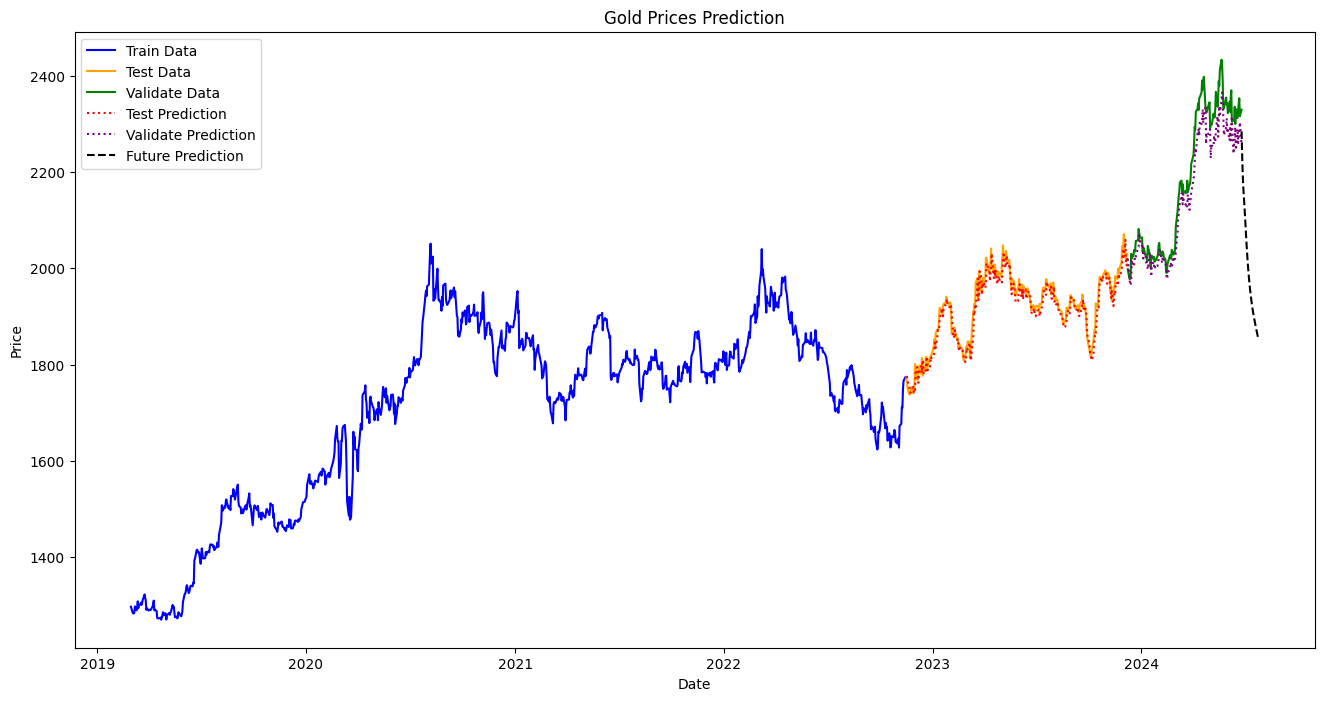

In [21]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 178.07480629187629
Lower Bound of Future Prediction: [[2099.47112729]
 [2061.96617757]
 [2026.58194264]
 [1997.10733205]
 [1973.34909288]
 [1954.0977978 ]
 [1937.8027032 ]
 [1923.14609349]
 [1909.27436553]
 [1895.80635847]
 [1882.72020641]
 [1870.19874993]
 [1858.48695655]
 [1847.7910599 ]
 [1838.22642864]
 [1829.80673763]
 [1822.46097476]
 [1816.06086008]
 [1810.45138863]
 [1805.47533417]
 [1800.98914532]
 [1796.87127544]
 [1793.02475098]
 [1789.37425606]
 [1785.86307818]
 [1782.44824909]
 [1779.09714349]
 [1775.78546593]
 [1772.49412712]
 [1769.21056286]]
Upper Bound of Future Prediction: [[2455.62073987]
 [2418.11579015]
 [2382.73155523]
 [2353.25694464]
 [2329.49870546]
 [2310.24741038]
 [2293.95231578]
 [2279.29570608]
 [2265.42397812]
 [2251.95597105]
 [2238.86981899]
 [2226.34836251]
 [2214.63656913]
 [2203.94067248]
 [2194.37604122]
 [2185.95635021]
 [2178.61058735]
 [2172.21047266]
 [2166.60100121]
 [2161.62494675]
 [2157.1387579 ]
 [2153.02088802]
 [2149.1743

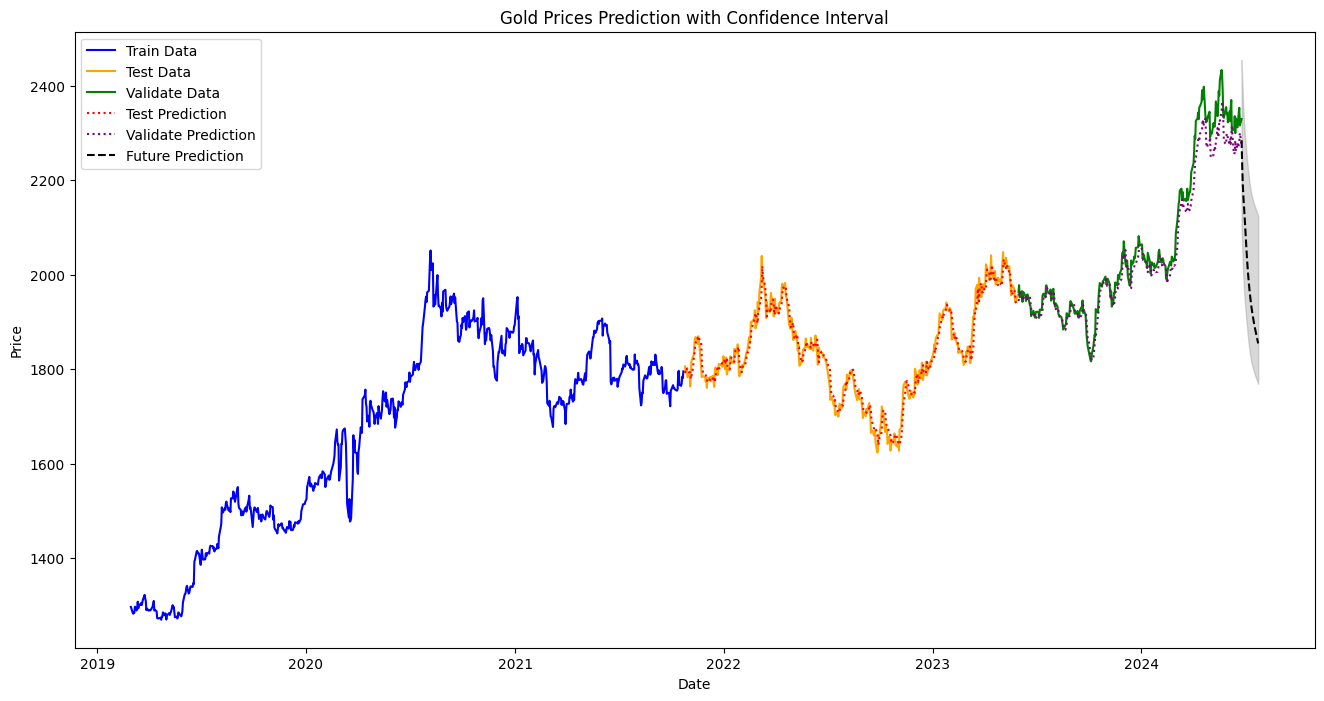

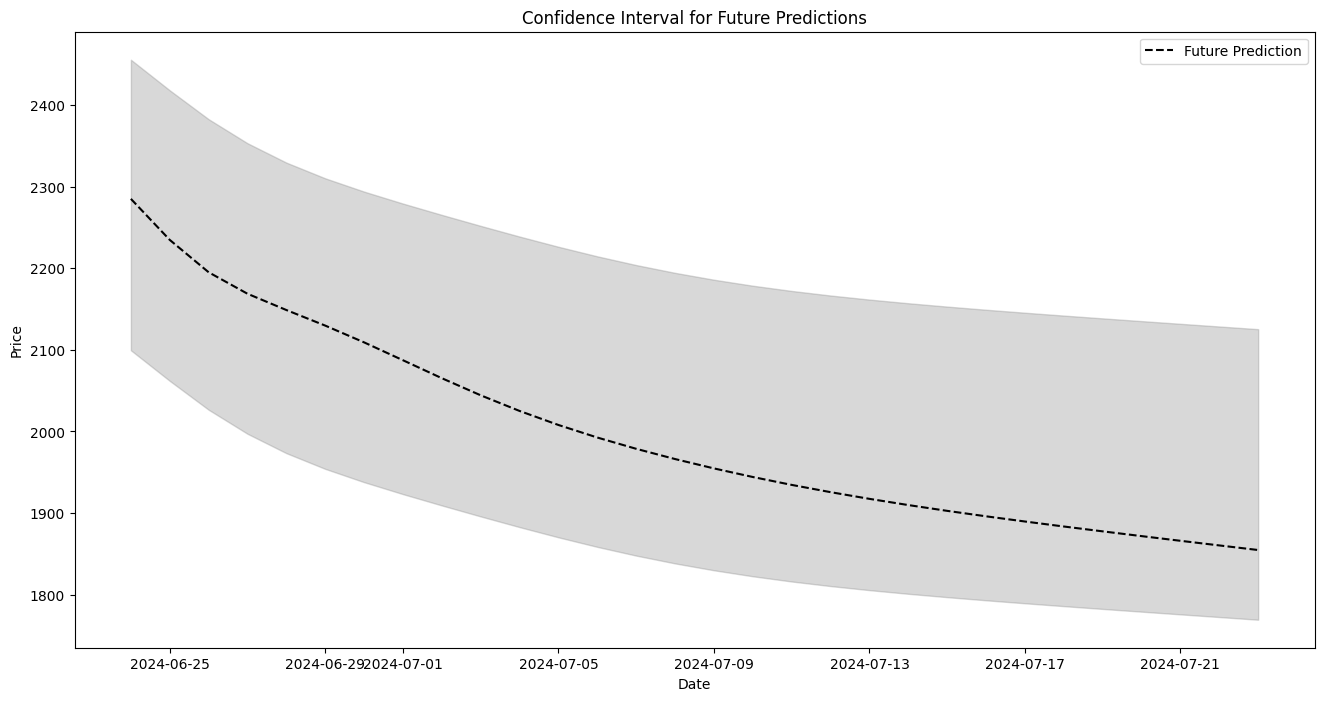

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [23]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.966239100538314
MAPE:  0.7250050776095164
RMSE:  18.32821993920444

** Validate **
MAE:  36.0939019097222
MAPE:  1.6041548862076644
RMSE:  44.192411405856745


In [24]:
# Split dataset 6-3-1

In [25]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [26]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [27]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.13271, saving model to save_model_6_3_1.keras
15/15 - 3s - 188ms/step - loss: 0.1327
Epoch 2/80

Epoch 2: loss improved from 0.13271 to 0.03866, saving model to save_model_6_3_1.keras
15/15 - 1s - 44ms/step - loss: 0.0387
Epoch 3/80

Epoch 3: loss improved from 0.03866 to 0.03411, saving model to save_model_6_3_1.keras
15/15 - 1s - 44ms/step - loss: 0.0341
Epoch 4/80

Epoch 4: loss improved from 0.03411 to 0.03187, saving model to save_model_6_3_1.keras
15/15 - 1s - 44ms/step - loss: 0.0319
Epoch 5/80

Epoch 5: loss did not improve from 0.03187
15/15 - 1s - 43ms/step - loss: 0.0321
Epoch 6/80

Epoch 6: loss improved from 0.03187 to 0.02904, saving model to save_model_6_3_1.keras
15/15 - 1s - 45ms/step - loss: 0.0290
Epoch 7/80

Epoch 7: loss improved from 0.02904 to 0.02806, saving model to save_model_6_3_1.keras
15/15 - 1s - 45ms/step - loss: 0.0281
Epoch 8/80

Epoch 8: loss did not improve from 0.02806
15/15 - 1s - 45ms/step - loss: 0.0320
Epoch 

In [29]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [30]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [31]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6689850176124654, 0.6729349559903242, 0.6584235129714655, 0.6494933861277543, 0.6570496714918301, 0.6576506943837377, 0.6550747023029009, 0.6474326763169937, 0.6430534059256623, 0.6213292689343695, 0.6190967634277884, 0.6292289360553147, 0.6373003988720811, 0.6510390233032108, 0.6465740122900481, 0.6443414019660807, 0.6605701730388296, 0.6518976873301565, 0.6566203394783574, 0.6557616754514117, 0.6666666666666667, 0.7020435826498714, 0.728490476606751, 0.7420574101594462, 0.7564830077390869, 0.7630946788196136, 0.7807832416286022, 0.7841319474797812, 0.7651553886303744, 0.7780353490345584, 0.7673879989543417, 0.7624936559277062, 0.7654130297654125, 0.7616349919007606, 0.7630087285630103, 0.7840459972231777, 0.7631806290762171, 0.7775202763992544, 0.7782072495477654, 0.7910872099519497, 0.8140992381662744, 0.8304998049348444, 0.8515370735950121, 0.8802163682410866, 0.8754079754710546, 0.907092594211439, 0.9122445783731126, 0.9223768558180254, 0.9104415096973899, 0.9320798012

In [33]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9162536263465881], [0.9286845922470093], [0.9408358335494995], [0.9514559507369995], [0.959717869758606], [0.9658910036087036], [0.9707533717155457], [0.9750645160675049], [0.979263424873352], [0.983414351940155], [0.9873253107070923], [0.9907311797142029], [0.9934386014938354], [0.9953938722610474], [0.9966749548912048], [0.9974376559257507], [0.9978539347648621], [0.998067319393158], [0.9981757402420044], [0.9982367753982544], [0.9982830882072449], [0.9983381628990173], [0.9984259009361267], [0.9985719323158264], [0.9988002181053162], [0.9991278052330017], [0.9995617270469666], [1.0000983476638794], [1.000725269317627], [1.0014241933822632]]


In [34]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [35]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2336.36888785]
 [2350.84598892]
 [2364.99732276]
 [2377.36550968]
 [2386.98733937]
 [2394.17657014]
 [2399.83928333]
 [2404.86004141]
 [2409.75008999]
 [2414.58425904]
 [2419.13896105]
 [2423.1054356 ]
 [2426.2584986 ]
 [2428.53560665]
 [2430.0275553 ]
 [2430.91579681]
 [2431.40059509]
 [2431.64910279]
 [2431.7753697 ]
 [2431.84645123]
 [2431.90038712]
 [2431.9645271 ]
 [2432.0667068 ]
 [2432.23677493]
 [2432.50263652]
 [2432.88414445]
 [2433.38948973]
 [2434.01443802]
 [2434.74455088]
 [2435.55851775]]


In [36]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

Margin of Error: 178.07480629187629
Lower Bound of Future Prediction: [[2099.47112729]
 [2061.96617757]
 [2026.58194264]
 [1997.10733205]
 [1973.34909288]
 [1954.0977978 ]
 [1937.8027032 ]
 [1923.14609349]
 [1909.27436553]
 [1895.80635847]
 [1882.72020641]
 [1870.19874993]
 [1858.48695655]
 [1847.7910599 ]
 [1838.22642864]
 [1829.80673763]
 [1822.46097476]
 [1816.06086008]
 [1810.45138863]
 [1805.47533417]
 [1800.98914532]
 [1796.87127544]
 [1793.02475098]
 [1789.37425606]
 [1785.86307818]
 [1782.44824909]
 [1779.09714349]
 [1775.78546593]
 [1772.49412712]
 [1769.21056286]]
Upper Bound of Future Prediction: [[2455.62073987]
 [2418.11579015]
 [2382.73155523]
 [2353.25694464]
 [2329.49870546]
 [2310.24741038]
 [2293.95231578]
 [2279.29570608]
 [2265.42397812]
 [2251.95597105]
 [2238.86981899]
 [2226.34836251]
 [2214.63656913]
 [2203.94067248]
 [2194.37604122]
 [2185.95635021]
 [2178.61058735]
 [2172.21047266]
 [2166.60100121]
 [2161.62494675]
 [2157.1387579 ]
 [2153.02088802]
 [2149.1743

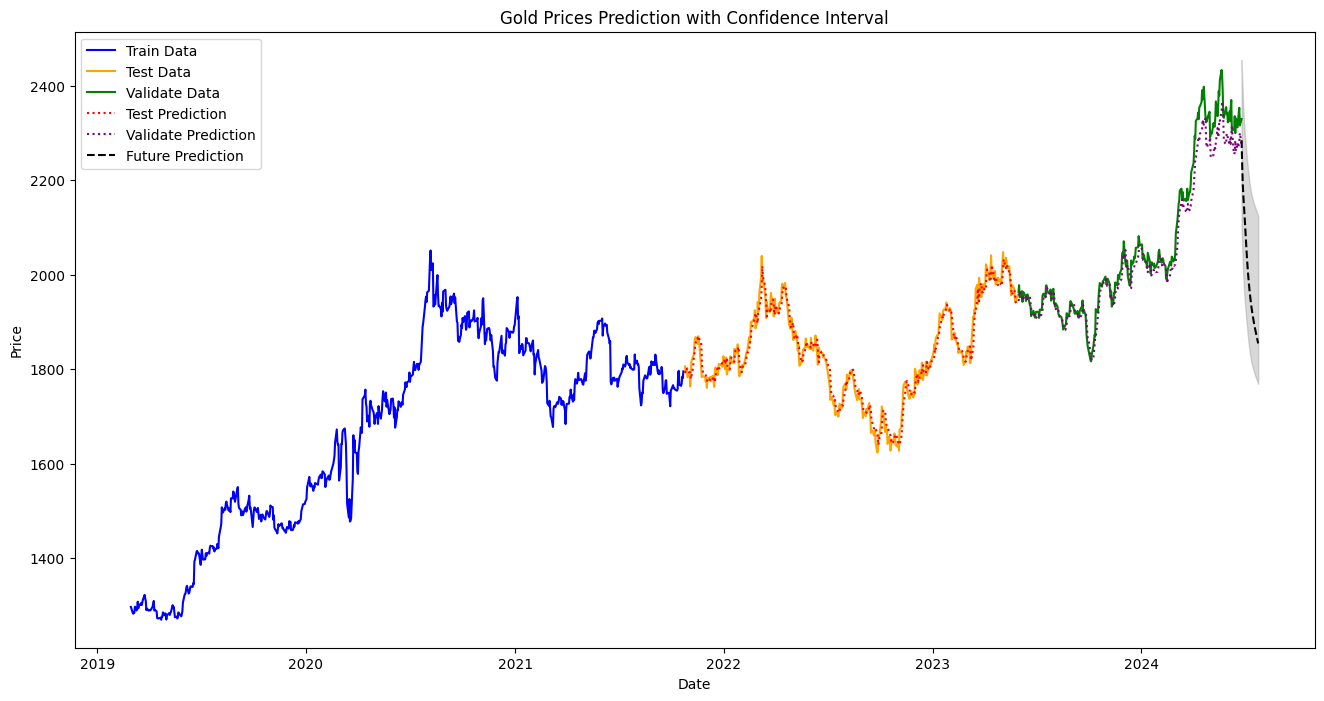

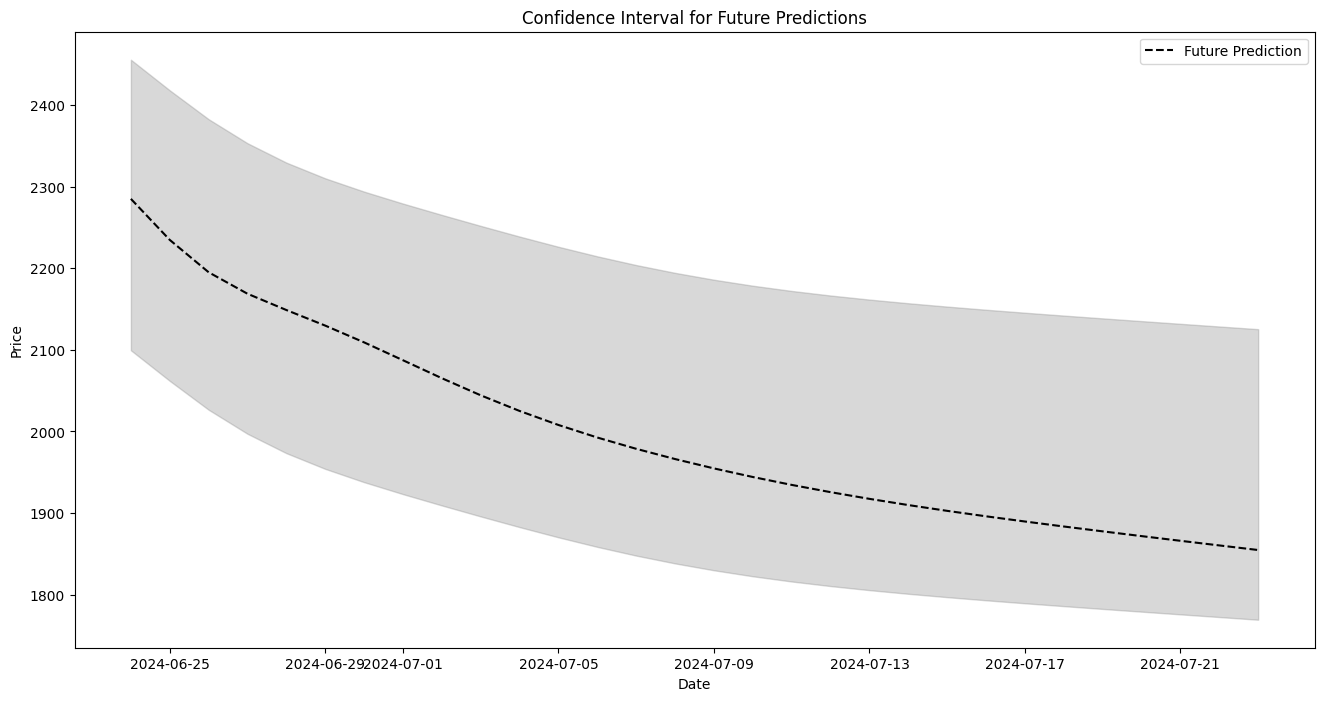

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [38]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.395991223114113
MAPE:  0.7257089257756679
RMSE:  17.418716504586634

** Validate **
MAE:  22.821632667824073
MAPE:  1.0181584528710093
RMSE:  28.561803306063183


In [39]:
# Split dataset 5-3-2 

In [40]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)# Split data



train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [41]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [42]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [43]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.18093, saving model to save_model_5_3_2.keras
12/12 - 3s - 229ms/step - loss: 0.1809
Epoch 2/80

Epoch 2: loss improved from 0.18093 to 0.05785, saving model to save_model_5_3_2.keras
12/12 - 1s - 45ms/step - loss: 0.0578
Epoch 3/80

Epoch 3: loss improved from 0.05785 to 0.03896, saving model to save_model_5_3_2.keras
12/12 - 1s - 45ms/step - loss: 0.0390
Epoch 4/80

Epoch 4: loss improved from 0.03896 to 0.03151, saving model to save_model_5_3_2.keras
12/12 - 1s - 50ms/step - loss: 0.0315
Epoch 5/80

Epoch 5: loss improved from 0.03151 to 0.03028, saving model to save_model_5_3_2.keras
12/12 - 1s - 51ms/step - loss: 0.0303
Epoch 6/80

Epoch 6: loss did not improve from 0.03028
12/12 - 1s - 46ms/step - loss: 0.0321
Epoch 7/80

Epoch 7: loss improved from 0.03028 to 0.02978, saving model to save_model_5_3_2.keras
12/12 - 1s - 48ms/step - loss: 0.0298
Epoch 8/80

Epoch 8: loss did not improve from 0.02978
12/12 - 1s - 47ms/step - loss: 0.0304
Epoch 

In [44]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [45]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [46]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [47]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6689850176124654, 0.6729349559903242, 0.6584235129714655, 0.6494933861277543, 0.6570496714918301, 0.6576506943837377, 0.6550747023029009, 0.6474326763169937, 0.6430534059256623, 0.6213292689343695, 0.6190967634277884, 0.6292289360553147, 0.6373003988720811, 0.6510390233032108, 0.6465740122900481, 0.6443414019660807, 0.6605701730388296, 0.6518976873301565, 0.6566203394783574, 0.6557616754514117, 0.6666666666666667, 0.7020435826498714, 0.728490476606751, 0.7420574101594462, 0.7564830077390869, 0.7630946788196136, 0.7807832416286022, 0.7841319474797812, 0.7651553886303744, 0.7780353490345584, 0.7673879989543417, 0.7624936559277062, 0.7654130297654125, 0.7616349919007606, 0.7630087285630103, 0.7840459972231777, 0.7631806290762171, 0.7775202763992544, 0.7782072495477654, 0.7910872099519497, 0.8140992381662744, 0.8304998049348444, 0.8515370735950121, 0.8802163682410866, 0.8754079754710546, 0.907092594211439, 0.9122445783731126, 0.9223768558180254, 0.9104415096973899, 0.9320798012

In [48]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8657444715499878], [0.8335403203964233], [0.8031571507453918], [0.7778483629226685], [0.7574480175971985], [0.7409176230430603], [0.7269256114959717], [0.7143405079841614], [0.7024293541908264], [0.6908648610115051], [0.6796282529830933], [0.6688765287399292], [0.6588200330734253], [0.6496358513832092], [0.6414230465888977], [0.6341933608055115], [0.6278858184814453], [0.6223902702331543], [0.617573618888855], [0.6133008599281311], [0.6094487309455872], [0.6059128642082214], [0.6026099920272827], [0.5994754433631897], [0.5964605212211609], [0.5935283303260803], [0.5906508564949036], [0.5878072381019592], [0.5849810838699341], [0.5821616053581238]]


In [49]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [50]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2277.54593358]
 [2240.04098386]
 [2204.65674894]
 [2175.18213835]
 [2151.42389917]
 [2132.17260409]
 [2115.87750949]
 [2101.22089979]
 [2087.34917182]
 [2073.88116476]
 [2060.7950127 ]
 [2048.27355622]
 [2036.56176284]
 [2025.86586619]
 [2016.30123493]
 [2007.88154392]
 [2000.53578106]
 [1994.13566637]
 [1988.52619492]
 [1983.55014046]
 [1979.06395161]
 [1974.94608173]
 [1971.09955727]
 [1967.44906236]
 [1963.93788447]
 [1960.52305538]
 [1957.17194978]
 [1953.86027222]
 [1950.56893341]
 [1947.28536915]]


In [51]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

Margin of Error: 178.07480629187629
Lower Bound of Future Prediction: [[2099.47112729]
 [2061.96617757]
 [2026.58194264]
 [1997.10733205]
 [1973.34909288]
 [1954.0977978 ]
 [1937.8027032 ]
 [1923.14609349]
 [1909.27436553]
 [1895.80635847]
 [1882.72020641]
 [1870.19874993]
 [1858.48695655]
 [1847.7910599 ]
 [1838.22642864]
 [1829.80673763]
 [1822.46097476]
 [1816.06086008]
 [1810.45138863]
 [1805.47533417]
 [1800.98914532]
 [1796.87127544]
 [1793.02475098]
 [1789.37425606]
 [1785.86307818]
 [1782.44824909]
 [1779.09714349]
 [1775.78546593]
 [1772.49412712]
 [1769.21056286]]
Upper Bound of Future Prediction: [[2455.62073987]
 [2418.11579015]
 [2382.73155523]
 [2353.25694464]
 [2329.49870546]
 [2310.24741038]
 [2293.95231578]
 [2279.29570608]
 [2265.42397812]
 [2251.95597105]
 [2238.86981899]
 [2226.34836251]
 [2214.63656913]
 [2203.94067248]
 [2194.37604122]
 [2185.95635021]
 [2178.61058735]
 [2172.21047266]
 [2166.60100121]
 [2161.62494675]
 [2157.1387579 ]
 [2153.02088802]
 [2149.1743

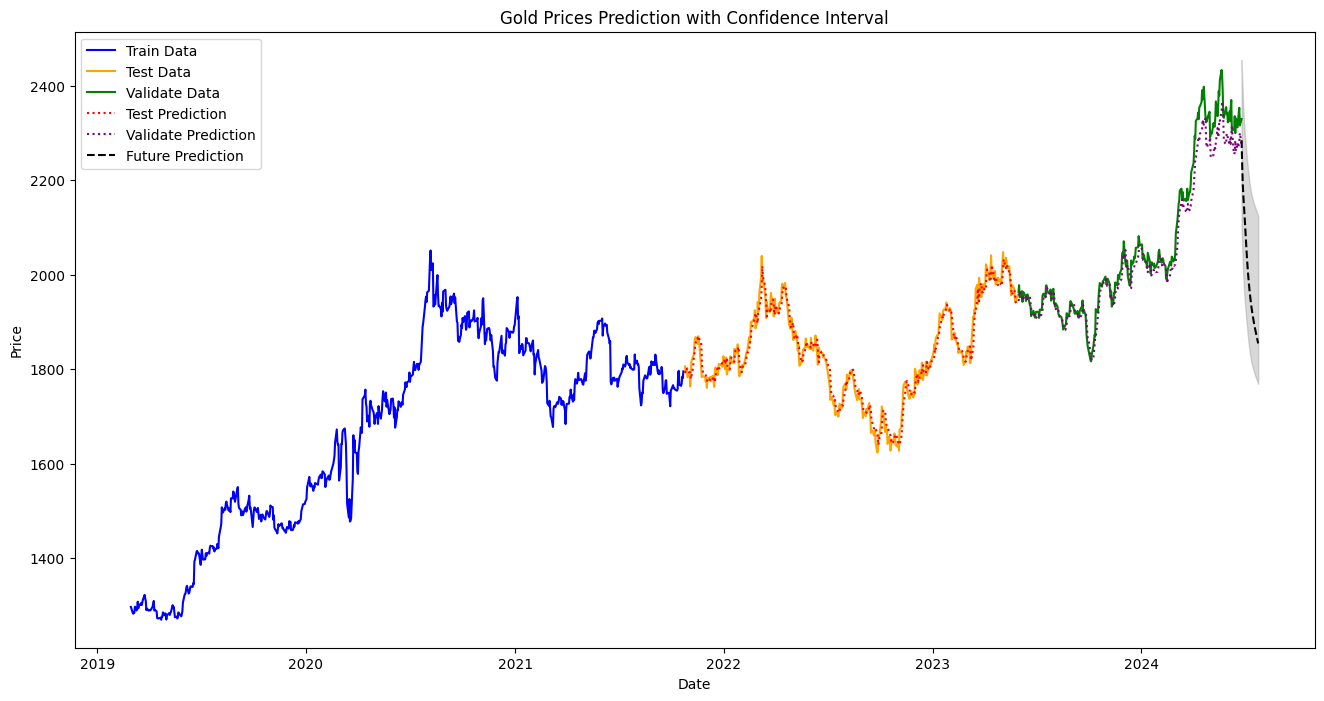

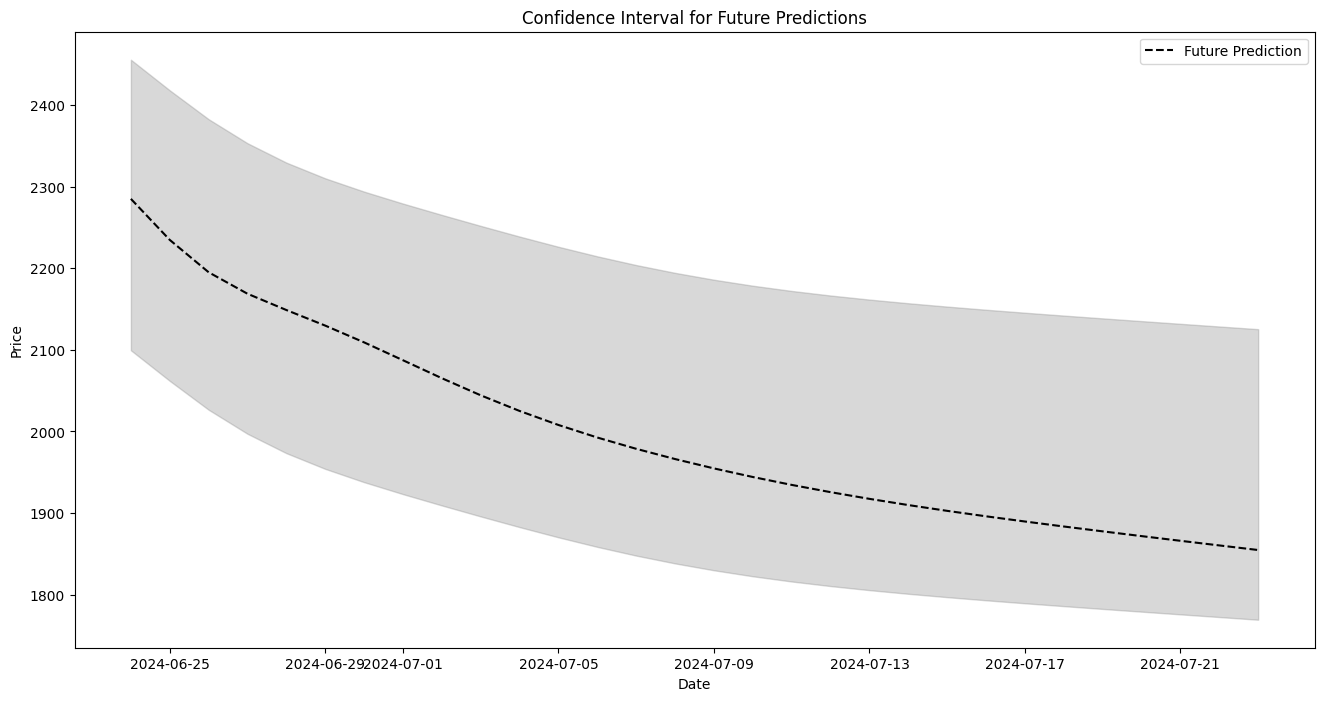

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [53]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.612896774177825
MAPE:  0.7977917798584139
RMSE:  19.063116900684015

** Validate **
MAE:  23.50882672731758
MAPE:  1.0861618040129877
RMSE:  32.077259562588495


In [54]:
import pandas as pd

data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [12.5019, 13.0908, 18.5606],
    "Testing MAPE": [0.6512, 0.7031, 1.0217],
    "Testing RMSE": [16.8448, 17.2823, 23.9815],
    "Validation MAE": [21.3910, 26.0325, 23.6238],
    "Validation MAPE": [0.9552, 1.1637, 1.0993],
    "Validation RMSE": [28.0878, 32.3465, 32.1555],
}

df = pd.DataFrame(data)

print(df.to_string(index=False))

Model Ratio  Testing MAE  Testing MAPE  Testing RMSE  Validation MAE  Validation MAPE  Validation RMSE
 LSTM 7-2-1      12.5019        0.6512       16.8448         21.3910           0.9552          28.0878
 LSTM 6-3-1      13.0908        0.7031       17.2823         26.0325           1.1637          32.3465
 LSTM 5-3-2      18.5606        1.0217       23.9815         23.6238           1.0993          32.1555
